# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tanto Wijaya
- **Email:** tanto.twjy@gmail.com
- **ID Dicoding:** tanto1602

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh jenis musim terhadap jumlah pengguna sepeda?
- Bagaimana pengaruh jenis cuaca terhadap jumlah pengguna sepeda?
- Bagaimana trend penggunaan sepeda tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

Sebelum melakukan analisis data, import terlebih dahulu library yang dibutuhkan.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada proyek ini, data yang digunakan merupakan data open-source yang tersedia di [kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset). Data tersebut kemudian diunduh dan disimpan pada repository github. Data yang digunakan merupakan data bike sharing (penggunaan sepeda) yang terdiri dari data **day.csv** dan **hour.csv**.

In [2]:
# Memuat tabel day
day_df = pd.read_csv("https://raw.githubusercontent.com/tantowjy/BikeSharingAnalysis/main/dataset/day.csv")

# Menampilkan 5 baris pertama tabel day
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv("https://raw.githubusercontent.com/tantowjy/BikeSharingAnalysis/main/dataset/hour.csv")

# Menampilkan 5 baris pertama tabel hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

1. Memeriksa tipe data dari tiap kolom

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada informasi diatas, terdapat tipe data yang tidak sesuai, yaitu tipe data dari **dteday** yang harusnya `datetime`.

2. Memeriksa apakah ada missing value atau tidak.

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value.

3. Memeriksa duplikasi data.

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


4. Memeriksa parameter statistik

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada setiap nilai parameter statistik.

#### Menilai Data hour_df

1. Memeriksa tipe data dari setiap kolom

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada informasi diatas, terdapat tipe data yang tidak sesuai, yaitu tipe data dari **dteday** yang harusnya `datetime`.

2. Memeriksa apakah ada missing value atau tidak.

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value.

3. Memeriksa duplikasi

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


4. Memeriksa parameter statistik.

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada setiap nilai parameter statistik.

### Cleaning Data

1. Menghapus kolom yang tidak diperlukan.

Pada data terdapat kolom `instant` yang merupakan indeks pencatatan yang tidak diperlukan untuk analisis data, sehingga kolom ini dapat dihapus.

In [12]:
day_df.drop(labels='instant', axis=1, inplace=True)
hour_df.drop(labels='instant', axis=1, inplace=True)

2. Mengubah tipe data dari dteday menjadi _datetime_.

In [13]:
# Mengubah tipe data dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Memeriksa tipe data dteday
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


Pada informasi diatas, tipe data **dteday** sudah berubah menjadi `datetime`.

3. Mengubah detail tabel.

Mengubah beberapa nama judul kolom dan detail pada kolom season, mnth, weathersit agar mudah lebih mudah dibaca

In [14]:
# Mengubah beberapa nama judul kolom
day_df.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace=True)

hour_df.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace=True)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya, lakukan perubahan nilai pada kolom season, month, daan weathersit menjadi nama yang dapat dipahami serta merubah nilai year menjadi nilai year semestinya.

In [15]:
# Mengubah nilai pada kolom season menjadi nama season
day_df.season.replace((1,2,3,4), ('dingin', 'semi', 'panas', 'gugur'), inplace=True)
hour_df.season.replace((1,2,3,4), ('dingin', 'semi', 'panas', 'gugur'), inplace=True)

# Mengubah nilai variabel year
day_df['year'] = day_df['dateday'].dt.year
hour_df['year'] = hour_df['dateday'].dt.year

# Mengubah nilai pada kolom month menjadi nama bulan
day_df['month'] = day_df['dateday'].dt.month_name()
hour_df['month'] = hour_df['dateday'].dt.month_name()

# Mengubah nilai pada kolom weathersit menjadi keterangan cuaca
day_df.weathersit.replace(
    (1,2,3,4),
    ('cerah/berawan', 'berawan dan berkabut', 'hujan/salju ringan', 'hujan/salju lebat'),
    inplace=True
)

hour_df.weathersit.replace(
    (1,2,3,4),
    ('cerah/berawan', 'berawan dan berkabut', 'hujan/salju ringan', 'hujan/salju lebat'),
    inplace=True
)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,dingin,2011,January,0,0,6,0,cerah/berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,dingin,2011,January,1,0,6,0,cerah/berawan,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,dingin,2011,January,2,0,6,0,cerah/berawan,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,dingin,2011,January,3,0,6,0,cerah/berawan,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,dingin,2011,January,4,0,6,0,cerah/berawan,0.24,0.2879,0.75,0.0,0,1,1


4. Menggabungkan dua dataframe menjadi satu dataframe.

In [16]:
all_df = hour_df.merge(day_df, on='dateday', how='inner', suffixes=('_hour', '_day'))
all_df.head()

,dateday,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,count_day
0,2011-01-01,dingin,2011,January,0,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,dingin,2011,January,1,0,6,0,cerah/berawan,0.22,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,dingin,2011,January,2,0,6,0,cerah/berawan,0.22,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,dingin,2011,January,3,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,dingin,2011,January,4,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985


Menyimpan hasil cleaning data.

In [17]:
hour_df.to_csv("data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

Dalam melakukan EDA, data yang digunakan adalah `hour_df` karena data tersebut memiliki keterangan cuaca lebih rinci pada setiap jam.

Casual User:  620017
Registered User:  2672662


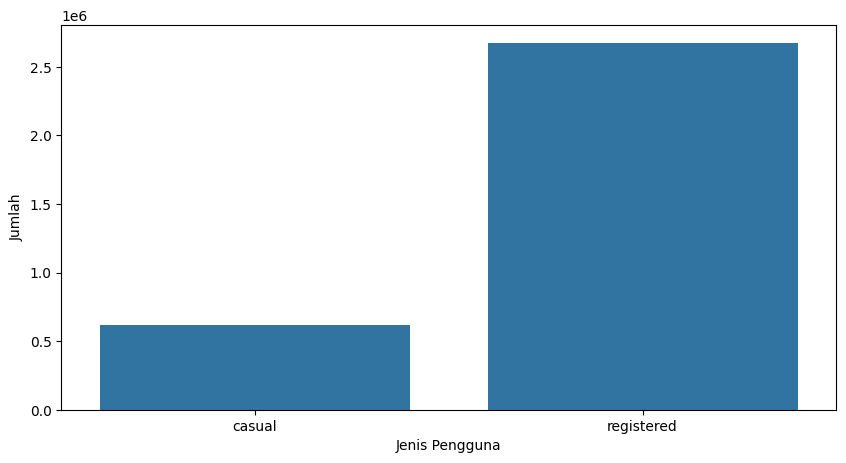

In [18]:
casual_user = hour_df['casual'].sum()
registered_user = hour_df['registered'].sum()
print("Casual User: ", casual_user)
print("Registered User: ", registered_user)

plt.figure(figsize=(10,5))
sns.barplot(x=["casual", "registered"], y=[casual_user, registered_user])
plt.xlabel("Jenis Pengguna")
plt.ylabel("Jumlah")
plt.show()

Dari informasi tersebut, dapat disimpulkan bahwa pengguna yang terdaftar (registered user) masih jauh lebih dominan dibandingkan dengan pengguna yang tidak terdaftar (casual user).

#### Analisis pengguna berdasarkan musim

In [19]:
hour_df.groupby(by='season').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
season,,,
dingin,60622,410726,471348
gugur,129782,711831,841613
panas,226091,835038,1061129
semi,203522,715067,918589


<Axes: xlabel='season', ylabel='count'>

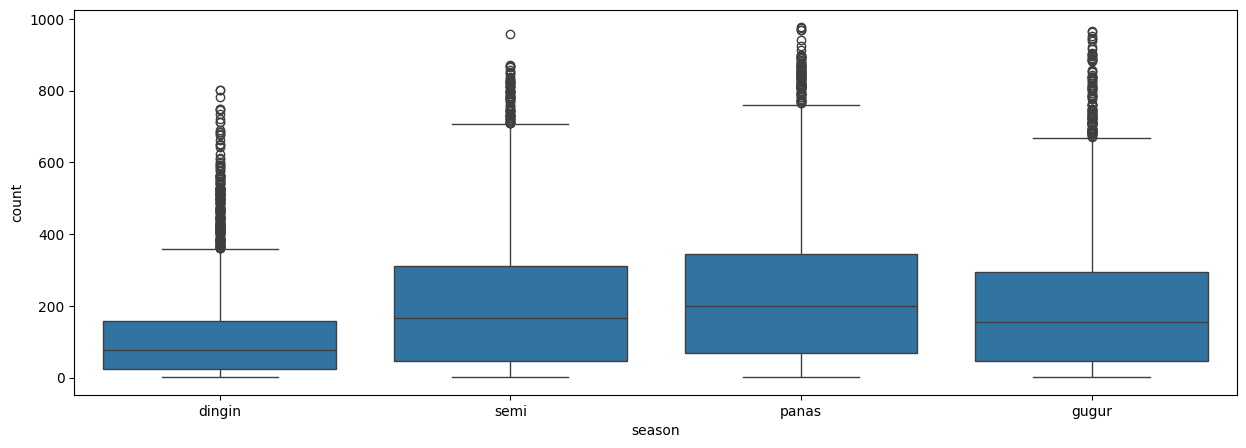

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='season',
    y='count',
    data=hour_df
)

<Axes: xlabel='season'>

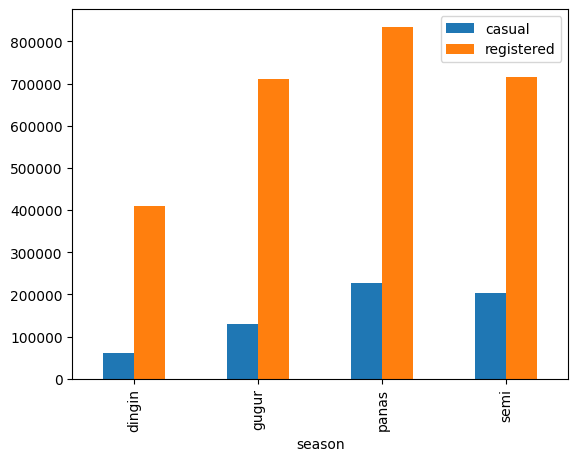

In [21]:
season_analysis = hour_df.iloc[:,[1,13,14]]
season_analysis_result = season_analysis.groupby(by='season').sum()
season_analysis_result.plot.bar()

Jumlah pengguna tertinggi terjadi pada musim panas dan terendah pada musim dingin. Pada chart diatas juga terlihat bahwa peningkatan/penurunan pada jumlah registered user diikuti oleh jumlah peningkatan/penurunan casual user.

#### Analisis pengguna berdasarkan tahun

In [22]:
hour_df.groupby(by='year').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


<Axes: xlabel='year', ylabel='count'>

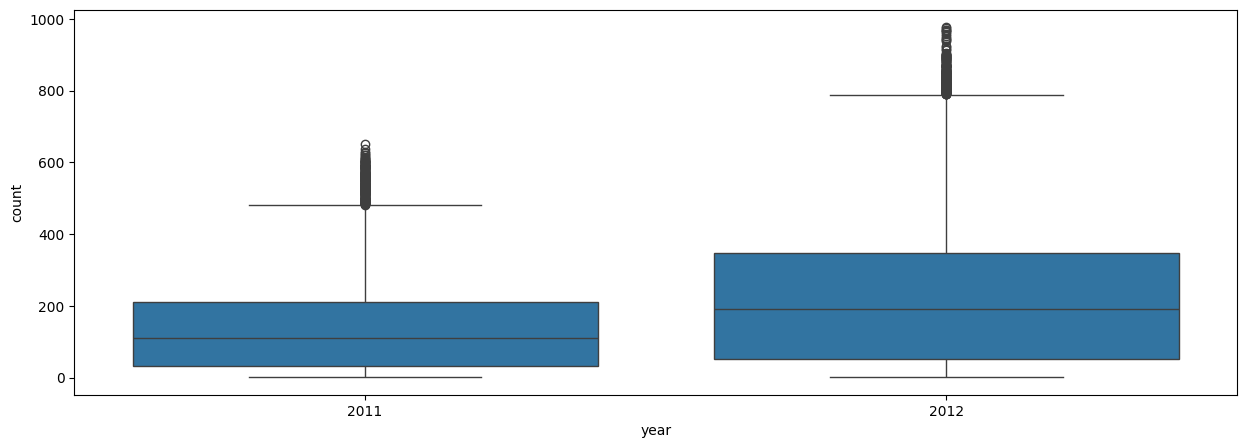

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='year',
    y='count',
    data=hour_df
)

<Axes: xlabel='year'>

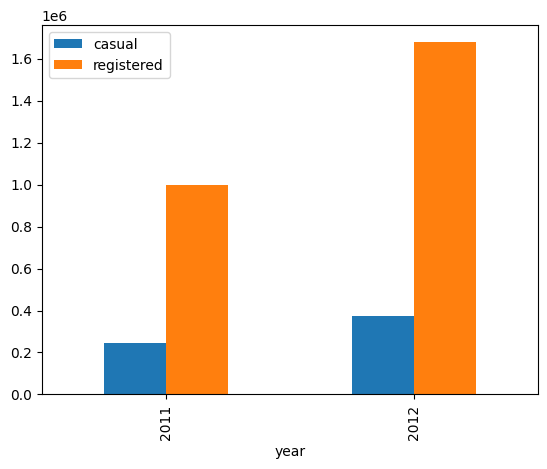

In [24]:
year_analysis = hour_df.iloc[:,[2,13,14]]
year_analysis_result = year_analysis.groupby(by='year').sum()
year_analysis_result.plot.bar()

Jumlah pengguna keseluruhan pada tahun 2012 mengalami kenaikan yang signifikan dibandingkan dengan tahun 2011.

#### Analisis pengguna berdasarkan bulan

In [25]:
hour_df.groupby(by='month').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
month,,,
April,60802,208292,269094
August,72039,279155,351194
December,21693,189343,211036
February,14963,136389,151352
January,12042,122891,134933
July,78157,266791,344948
June,73906,272436,346342
March,44444,184476,228920
May,75285,256401,331686


<Axes: xlabel='month', ylabel='count'>

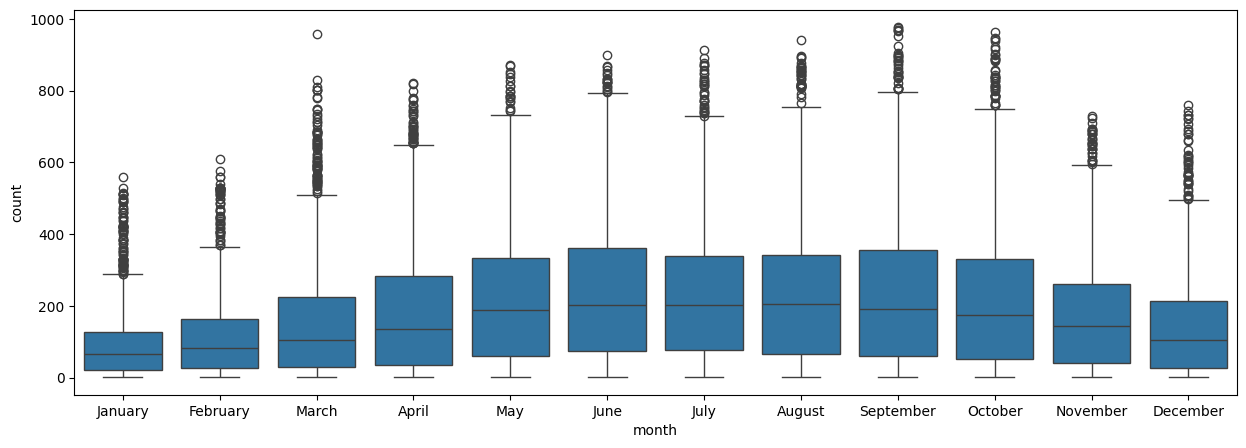

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='month',
    y='count',
    data=hour_df
)

Pada rentang bulan Mei - Oktober, jumlah pengguna sepeda tinggi. Jumlah pengguna sepada rendah terjadi pada bulan Januari - Februari.

#### Analisis pengguna berdasarkan cuaca

In [27]:
hour_df.groupby(by='weathersit').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
weathersit,,,
berawan dan berkabut,134481,661471,795952
cerah/berawan,462745,1875428,2338173
hujan/salju lebat,8,215,223
hujan/salju ringan,22783,135548,158331


<Axes: xlabel='weathersit', ylabel='count'>

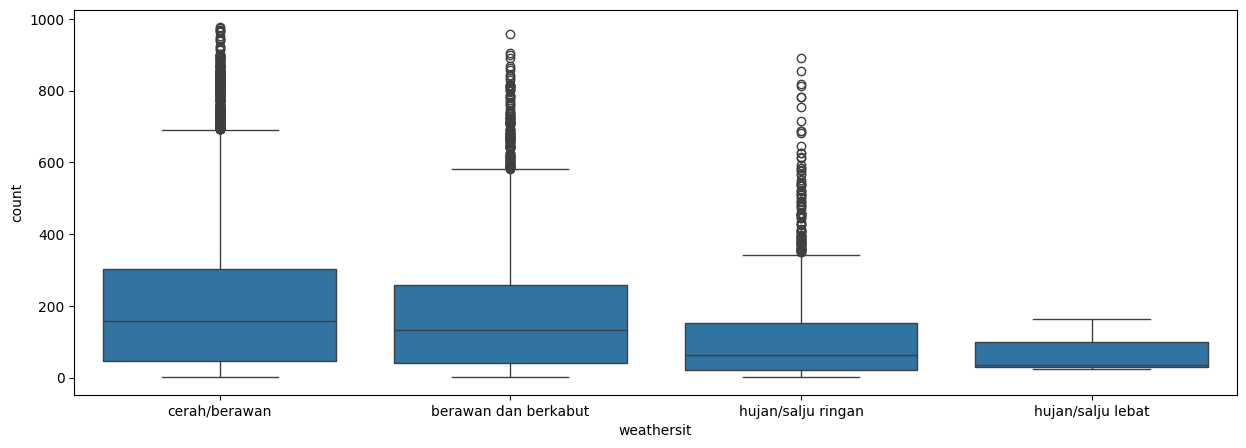

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='weathersit',
    y='count',
    data=hour_df
)

<Axes: xlabel='weathersit'>

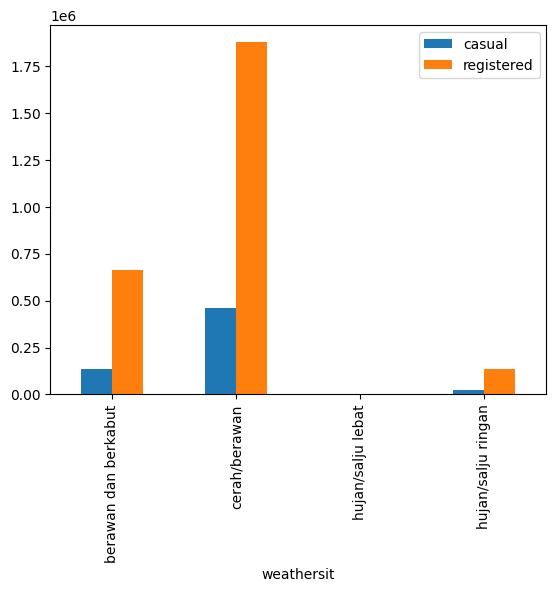

In [29]:
weather_analysis = hour_df.iloc[:,[8,13,14]]
weather_analysis_result = weather_analysis.groupby(by='weathersit').sum()
weather_analysis_result.plot.bar()

Penggunaan sepeda tertinggi terjadi pada saat cuaca cerah/berawan. Sedangkan pada saat kondisi cuaca hujan/salju lebat, jumlah pengguna sangat sedikit sekali.

#### Korelasi

<ipython-input-30-9fc43914addb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hour_df.corr(), annot=True, cmap="Blues", fmt=".2f")


<Axes: >

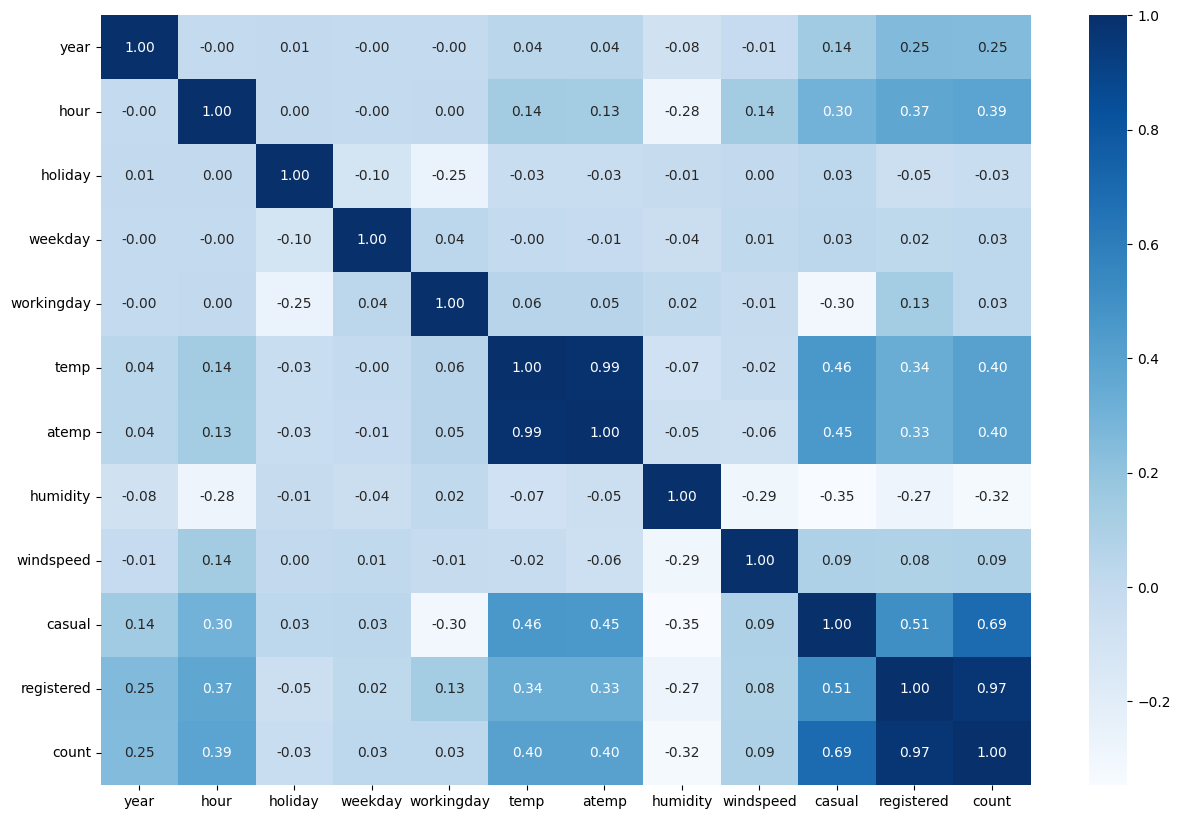

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(hour_df.corr(), annot=True, cmap="Blues", fmt=".2f")

- Terdapat korelasi yang sangat kuat antara `registered` dengan `count` serta `atemp` dengan `temp`.
- Terdapat korelasi yang kuat antara `casual` dengan `count`.
- Terdapat korelasi yang moderat antara `casual` dengan `temp` dan `atemp`.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh jenis musim terhadap jumlah pengguna sepeda?

Untuk menjawab pertanyaan 1, lihat terlebih dahulu statistik jumlah pengguna sepada untuk setiap musim.

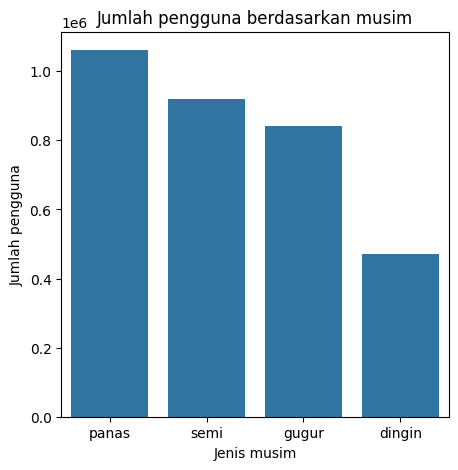

In [31]:
season_analysis = hour_df.iloc[:,[1,15]]
season_result = season_analysis.groupby(by='season').sum().reset_index().sort_values('count', ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x='season', y='count', data=season_result)
plt.title("Jumlah pengguna berdasarkan musim")
plt.xlabel("Jenis musim")
plt.ylabel("Jumlah pengguna")
plt.show()

Pada chart diatas, jenis musim berpengaruh terhadap jumlah pengguna sepeda. Jumlah pengguna sepeda tertinggi terjadi pada musim panas dan terendah pada musim dingin.

Untuk mendapatkan hasil analisis yang lebih baik, lakukan analisis lanjutan dengan menggunakan klasterisasi berdasarkan temperatur dan kecepatan angin.

In [32]:
# Denormalisai nilai temperature dan kecepatan angin
t_min = -8
t_max = 39
hour_df['temp'] = (hour_df['temp'] * (t_max - t_min)) + t_min
hour_df['windspeed'] = hour_df['windspeed']*67

hour_df.describe()

,year,hour,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,11.546752,0.028770,3.003683,0.682721,15.358397,0.475775,0.627229,12.736540,35.676218,153.786869,189.463088
std,0.500008,6.914405,0.167165,2.005771,0.465431,9.050138,0.171850,0.192930,8.196795,49.305030,151.357286,181.387599
min,2011.000000,0.000000,0.000000,0.000000,0.000000,-7.060000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,0.000000,1.000000,0.000000,7.980000,0.333300,0.480000,7.001500,4.000000,34.000000,40.000000
50%,2012.000000,12.000000,0.000000,3.000000,1.000000,15.500000,0.484800,0.630000,12.998000,17.000000,115.000000,142.000000
75%,2012.000000,18.000000,0.000000,5.000000,1.000000,23.020000,0.621200,0.780000,16.997900,48.000000,220.000000,281.000000
max,2012.000000,23.000000,1.000000,6.000000,1.000000,39.000000,1.000000,1.000000,56.996900,367.000000,886.000000,977.000000


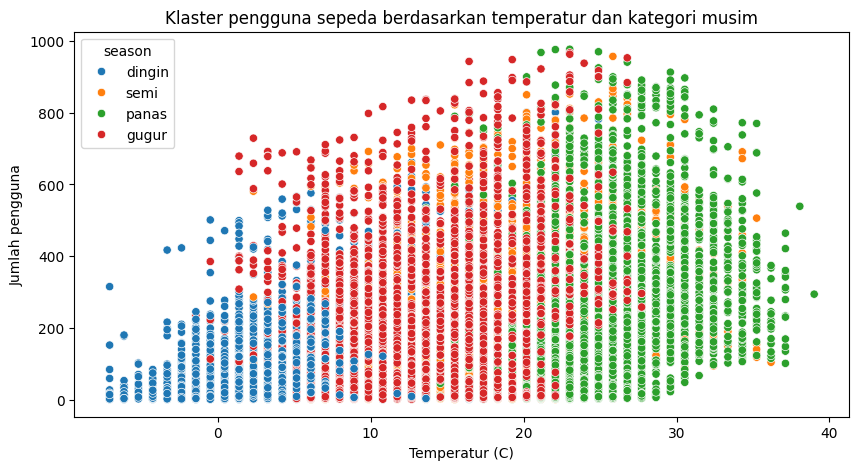

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='count', data=hour_df, hue='season')
plt.title("Klaster pengguna sepeda berdasarkan temperatur dan kategori musim")
plt.xlabel("Temperatur (C)")
plt.ylabel("Jumlah pengguna")
plt.show()

Berdasarkan klasterisasi diatas, jumlah penggunaan sepeda yang tinggi terjadi pada rentang temperatur 10-36 derajat celcius yang terjadi pada musim panas, gugur, dan semi. Pada saat memasuki musim dingin dan suhu < 10 derajat celcius, jumlah penggunaan sepeda mengalami penurunan.

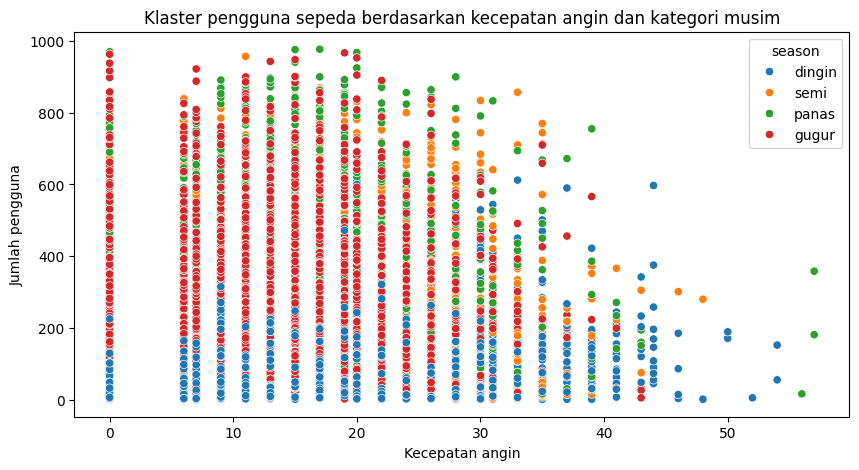

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='windspeed', y='count', data=hour_df, hue='season')
plt.title("Klaster pengguna sepeda berdasarkan kecepatan angin dan kategori musim")
plt.xlabel("Kecepatan angin")
plt.ylabel("Jumlah pengguna")
plt.show()

Pada klasterisasi diatas, jumlah pengguna sepeda mengalami penurunan ketika kecepatan angin > 30. Sedangkan pada saat kecepatan angin < 30, frekuensi penggunaan sepeda sangat tinggi, tetapi jumlah pengguna sepeda tetap dominan pada musim panas dan musim gugur.

### Pertanyaan 2: Bagaimana pengaruh jenis cuaca terhadap jumlah pengguna sepeda?

In [35]:
weather_analysis = hour_df.iloc[:,[8,15]]
weather_result = weather_analysis.groupby(by='weathersit').sum().reset_index().sort_values('count', ascending=False)
weather_result

,weathersit,count
1,cerah/berawan,2338173
0,berawan dan berkabut,795952
3,hujan/salju ringan,158331
2,hujan/salju lebat,223


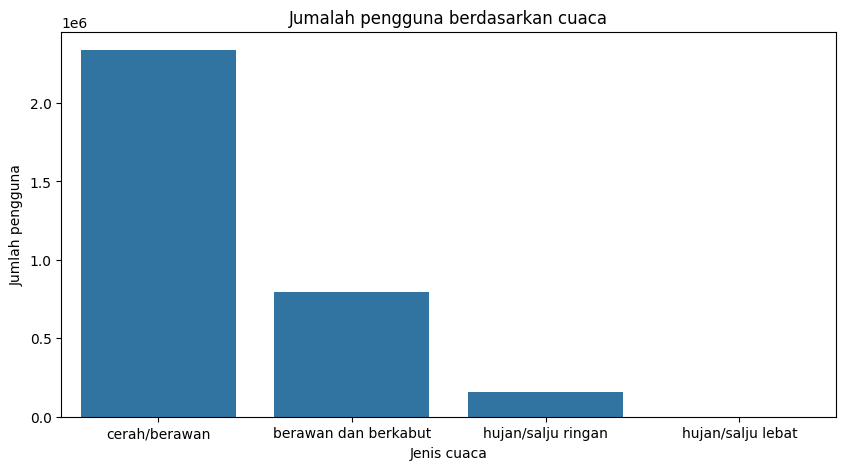

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='weathersit', y='count', data=weather_result)
plt.title("Jumalah pengguna berdasarkan cuaca")
plt.xlabel("Jenis cuaca")
plt.ylabel("Jumlah pengguna")
plt.show()

Jenis cuaca berpengaruh terhadap intensitas penggunaan sepeda. Pada cuaca cerah dan berawan, frekuensi pengguna sepeda sangat tinggi. Pada cuaca berawan dan berkabut, frekuensi pengguna sepeda cukup tinggi. Pada cuaca hujan dan salju ringan, frekuensi pengguna sepeda rendah. Pada cuaca hujan dan salju lebat, frekuensi pengguna sepeda sangat rendah.  

### Pertanyaan 3: Bagaimana trend penggunaan sepeda tahun 2011 dan 2012?

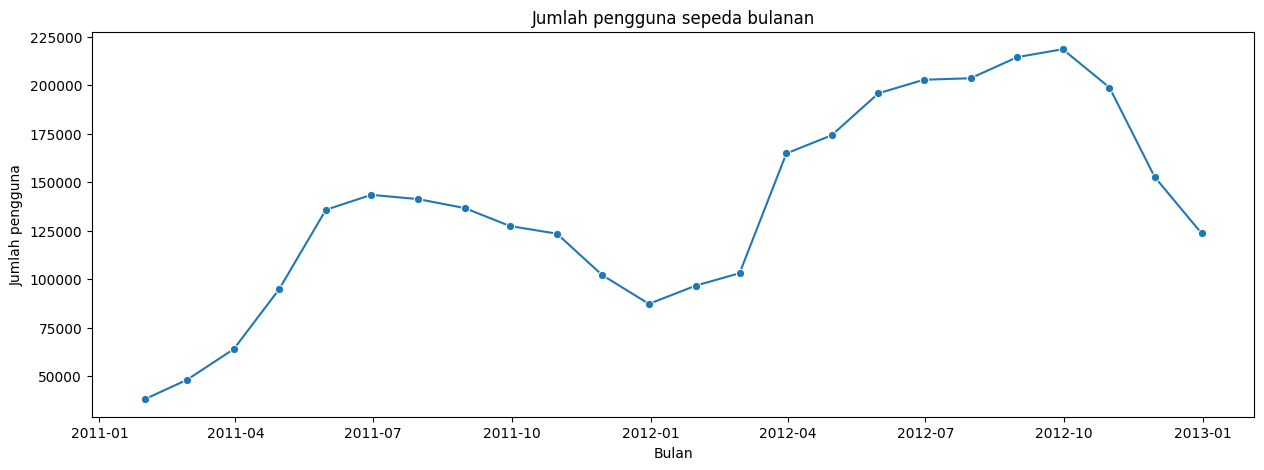

In [37]:
monthly_count = hour_df.resample(rule='M', on='dateday').agg({
    "count": "sum"
})

plt.figure(figsize=(15,5))
sns.lineplot(
    data=monthly_count,
    x="dateday",
    y="count",
    marker="o")
plt.title("Jumlah pengguna sepeda bulanan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah pengguna")
plt.show()

Tren pengguna sepeda meningkat pada bulan Maret dan menurun pada bulan November. Tren pengguna paling ramai, terjadi pada rentang bulan Mei-Oktober.

## Conclusion

- Conclution pertanyaan 1:
  - Jenis musim sangat berpengaruh terhadap jumlah penggunaan sepeda. Pada musim panas, jumlah penggunaan sepeda paling tinggi dikarenakan pada musim tersebut temperatur udara berada di rentang 20-36 derajat celcius dan kecepatan angin dibawah 30 mph. Pada musim dingin, jumlah penggunaan sepeda paling rendah dikarenakan pada musim tersebut temperatur udara dingin di rentang -8 sampai 10 derajat celcius.
- Conclution pertanyaan 2:
  - Jenis cuaca sangat berpengaruh terhadap jumlah penggunaan sepeda. Penggunaan sepeda tertinggi terjadi pada saat kondisi cuaca cerah/berawan dengan total penggunaan pada tahun 2011-2012 sebanyak 2,3 juta. Sedangkan pada saat hujan/salju lebat, penggunaan sepeda sangat sedikit sekali.
- Conclution pertanyaan 3:
  - Tren penggunaan sepeda pada tahun 2011 dan 2012 mengalami peningkatan pada bulan Maret (awal musim semi). Tren penggunaan sepeda paling tinggi terjadi pada rentang bulan Mei - Oktober yang bertepatan dengan akhir musim semi, musim panas dan awal musim gugur. Kemudian tren penggunaan sepeda menurun ketika bulan November (akhir musim gugur) karena mulai memasuki musim dingin.